In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

(1000, 2)
               day          mag
count  1000.000000  1000.000000
mean     31.968000    17.412438
std      18.484444     1.076524
min       0.000000    15.510356
25%      15.984000    16.401527
50%      31.968000    17.226028
75%      47.952000    18.465561
max      63.936000    19.718430


Text(0.5, 1.0, 'noisy SN')

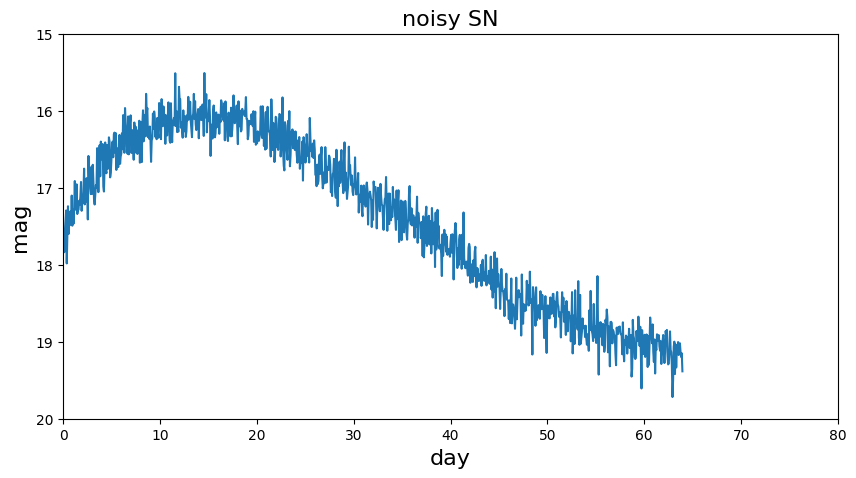

In [4]:
data = pd.read_csv('noisy_sn.dat', sep=r'\s+', names=['day','mag'])
print(data.shape)
print(data.describe())
plt.figure(figsize=(10, 5))
plt.plot(data['day'], data['mag'])
plt.xlim(0, 80)
plt.ylim(15, 20)
plt.gca().invert_yaxis()
plt.xlabel('day', fontsize=16); plt.ylabel('mag', fontsize=16); plt.title('noisy SN', fontsize=16)

In [64]:
def Gaussian_kernel(sigma, l, shift=True):
    if shift:length = np.linspace(-l // 2, l // 2, l)
    else:length = np.linspace(0, l, l)
    kernel = np.exp(-length**2 / (2 * sigma**2))
    kernel /= np.sum(kernel)
    
    return kernel

def Conv_self(data, kernel):
    kernel = np.flip(kernel)
    N = len(data)
    K = len(kernel)

    data_usage = np.zeros(N + 2*(K - 1))
    data_usage[K - 1:N + K - 1] = data
    result = np.zeros(N)
    
    for _ in range(N):
        result[_] = np.sum(data_usage[_:_+K] * kernel)
    
    return result

def Conv_data(data, kernel):
    N = len(data)
    K = len(kernel)
    
    kpad = np.zeros(N)
    kpad[:K] = kernel
    
    data_ft = np.fft.fft(data)
    kernel_ft = np.fft.fft(kpad)
    result = data_ft * kernel_ft
    
    return np.fft.ifft(result).real

In [65]:
kernel_1 = Gaussian_kernel(1, 10)
kernel_2 = Gaussian_kernel(2, 10)
kernel_5 = Gaussian_kernel(5, 10)
kernel_10 = Gaussian_kernel(10, 10)

In [66]:
result_1 = Conv_data(data['mag'], kernel_1)
result_2 = Conv_data(data['mag'], kernel_2)
result_5 = Conv_data(data['mag'], kernel_5)
result_10 = Conv_data(data['mag'], kernel_10)

In [67]:
res_self_1 = Conv_self(data['mag'], kernel_1)
res_self_2 = Conv_self(data['mag'], kernel_2)
res_self_5 = Conv_self(data['mag'], kernel_5)
res_self_10 = Conv_self(data['mag'], kernel_10)

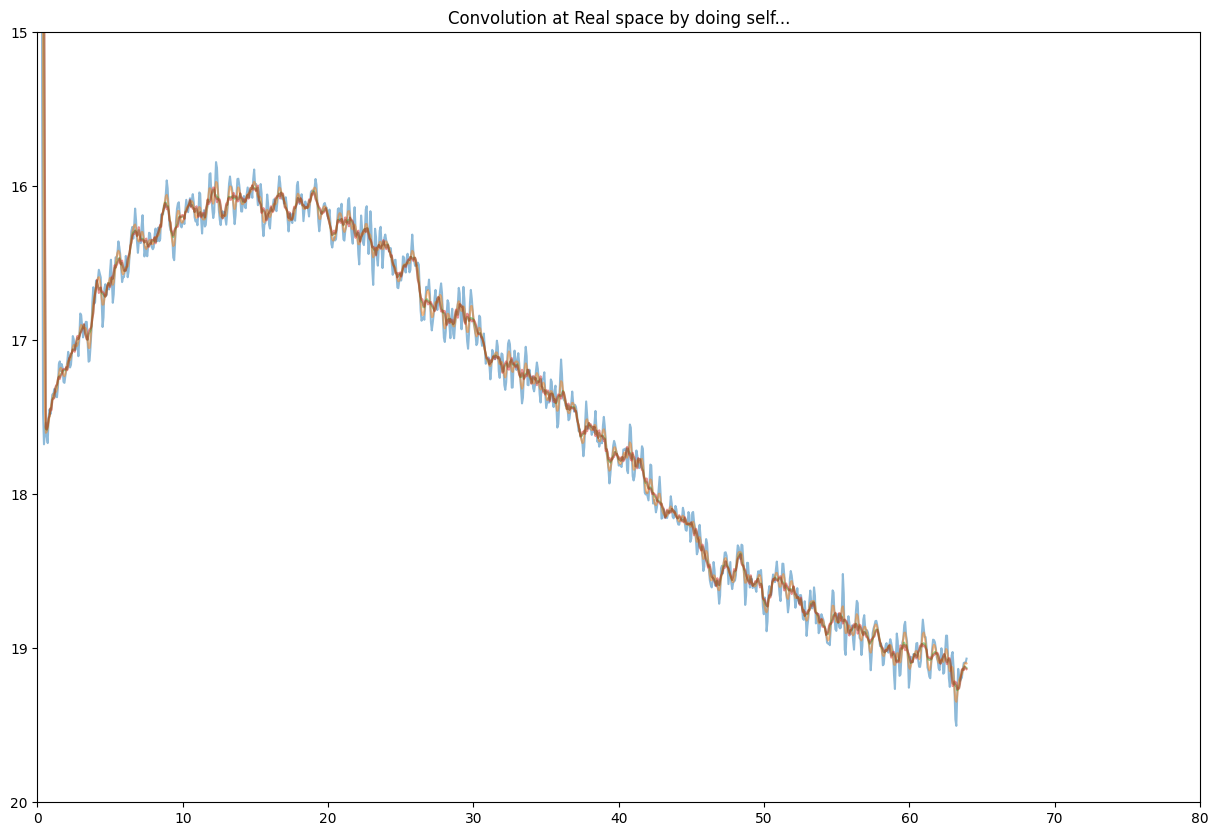

In [70]:
plt.figure(figsize=(15, 10))
plt.title("Convolution at Real space by doing self...")
plt.ylim(15, 20)
plt.xlim(0, 80)
plt.gca().invert_yaxis()
plt.plot(data['day'], res_self_1, label='sigma: 1', alpha=0.5)
plt.plot(data['day'], res_self_2, label='sigma: 2', alpha=0.5)
plt.plot(data['day'], res_self_5, label='sigma: 5', alpha=0.5)
plt.plot(data['day'], res_self_10, label='sigma: 10', alpha=0.5)

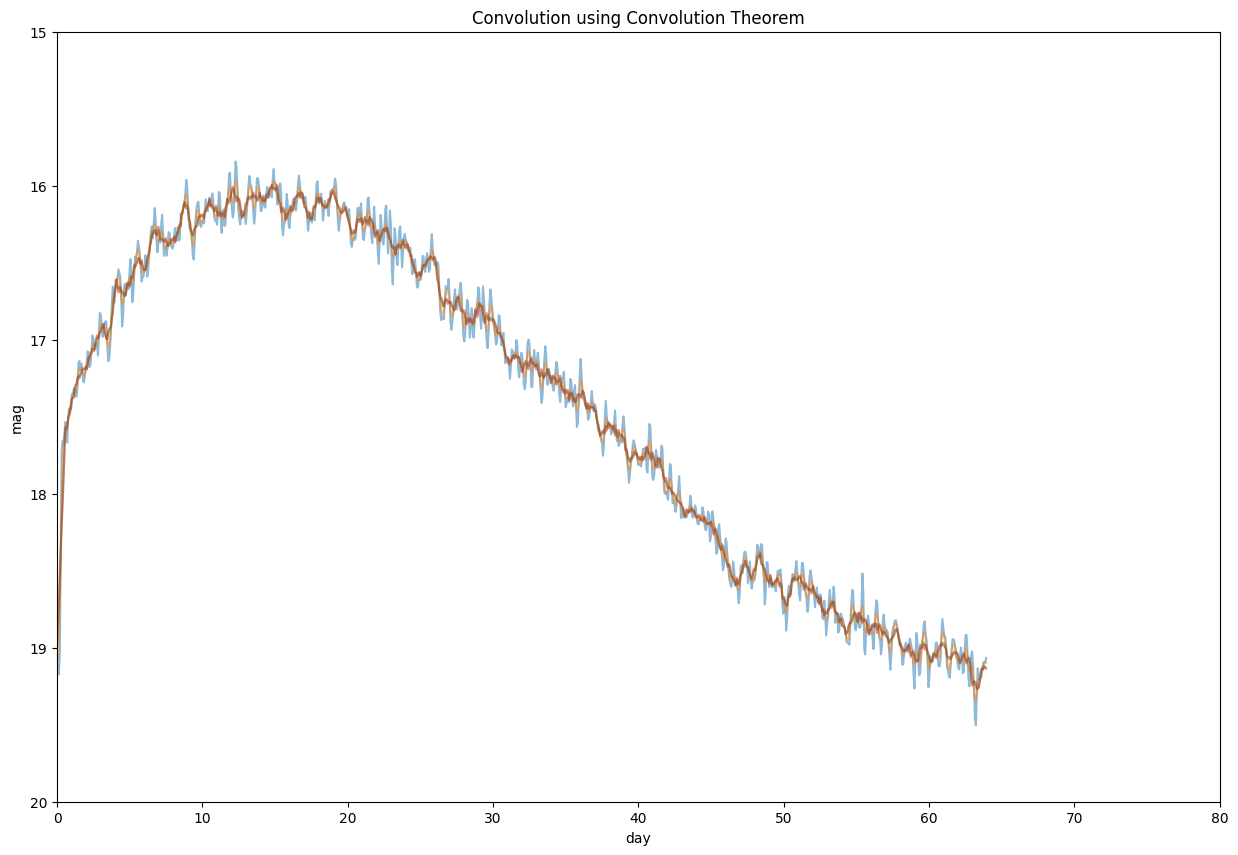

In [71]:
plt.figure(figsize=(15, 10))
plt.title("Convolution using Convolution Theorem")
plt.xlim(0, 80)
plt.ylim(15, 20)
plt.xlabel('day')
plt.ylabel('mag')
plt.gca().invert_yaxis()
plt.plot(data['day'], result_1, label='sigma: 1', alpha=0.5)
plt.plot(data['day'], result_2, label='sigma: 2', alpha=0.5)
plt.plot(data['day'], result_5, label='sigma: 5', alpha=0.5)
plt.plot(data['day'], result_10, label='sigma: 10', alpha=0.5)